### CROSS-VALIDATION & SIMPLE LINEAR REGRESSION
<b>Author:</b>Kevin Mntambo 
<br>
<b>Description:</b>We will use  linear regression to build a model that helps us determine how well, Years Worked predicts an employee’s salary.Then  we  are  going to use cross validation  to test the validity and strength of this model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.tools.eval_measures import rmse
import seaborn as sns
sns.set()

salary = pd.read_csv('../data/salary.csv')
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


## Null and Extreme Values

In [2]:
salary.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

There is one missing value under the salary column

In [3]:
salary.salary.fillna(salary.salary.mean(),inplace=True)


The missing values are replaced with the mean of all the values in that column.

We use the mean becuase salary has  continues numerical values .Ideally we don't want to lose any information that can help us analyze or create a better a model, and so if the particular feature like salary is numerical and continueos, we can replace with the mean becuase, no matter how many times we add the mean it still gets conserved,it doesn't change, for none numeric and/or discrete features however we would have to drop the values or replace them with a placeholder.

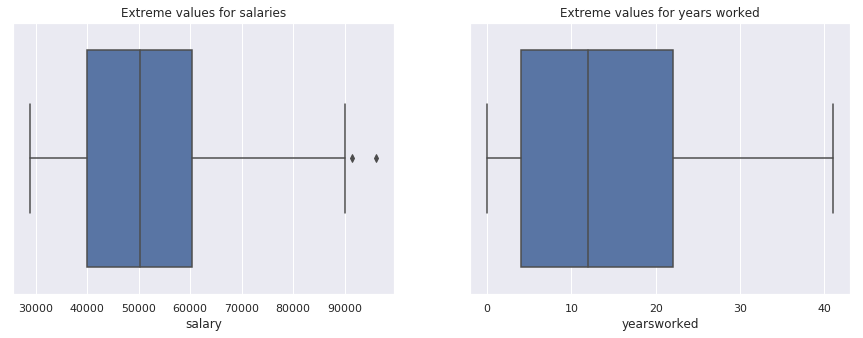

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)


axes[0].set_title('Extreme values for salaries')
sns.boxplot(ax=axes[0],x=salary['salary'])
axes[1].set_title('Extreme values for years worked')
sns.boxplot(ax=axes[1],x=salary['yearsworked'])


There are two extreme values in the salary column.

In [5]:
Q1 = salary['salary'].quantile(0.25)
Q3 = salary['salary'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (salary['salary'] >= Q1 - 1.5 * IQR) & (salary['salary'] <= Q3 + 1.5 *IQR)
salary=salary.loc[filter]

The extreme values are removed, because extreme values are unlikely observations in a dataset,if not removed extreme values may cause overfitting, as they do not represent what is typical for that data set.Extreme values tend to streach the mean to one direction , whereby the mean then no longer represents the distribution of the majaority of the data point which in turn makes the model poorly when given new data.


##  Distribution of  variables and relationship between dependent and independent variable.

Text(0.5, 0, 'years worked')

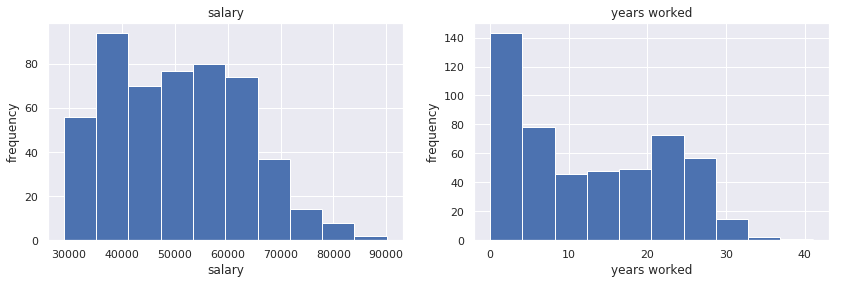

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))


ax1.hist(salary['salary'])
ax1.set_title('salary')
ax1.set_ylabel('frequency')
ax1.set_xlabel('salary')
ax2.hist(salary['yearsworked'])
ax2.set_title('years worked')
ax2.set_ylabel('frequency')
ax2.set_xlabel('years worked')


The distributions are posetively skewed.This means  the majority of the values lies in the lower half of the distribution.

Text(0, 0.5, 'years worked')

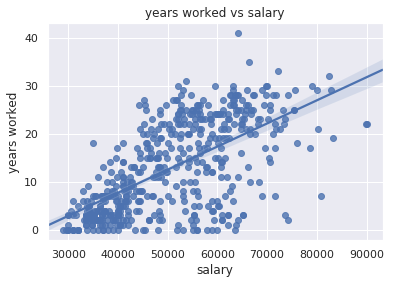

In [7]:
sns.regplot(salary['salary'],salary['yearsworked'])

plt.title('years worked vs salary')
plt.xlabel("salary")
plt.ylabel("years worked")

We can draw a line of best fit that is not curved , which confirms that there is  a linear nomial relationship exists between years worked and salary. therefore this confirms using linear regression to model this would work.
It is a positive and modearte association.

### Training and evaluating the model

In [8]:
X = salary.yearsworked
y = salary.salary

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=33)

In [9]:
x_train =sm.add_constant(x_train)
x_test =sm.add_constant(x_test)
model =sm.OLS(y_train, x_train).fit()

/home/kevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     228.1
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           3.61e-40
Time:                        20:55:23   Log-Likelihood:                -3789.5
No. Observations:                 358   AIC:                             7583.
Df Residuals:                     356   BIC:                             7591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.029e+04    841.079     47.900      

The null hypothesis states that there is no relationship between the two variables being studied (salary and years worked). It states that the results are due to chance and are not significant in that one does not affect the other.

A p-value is a measure of the probability that an observed difference could have occurred just by random chance. A p-value less than 0.05 is considered strong evidence against the null hypothesis since there is less than a 5% probability that the null hypothesis is correct and the results are random.

Years worked is a significant feature since the p value is 0 (less than .05), therefore we can  reject the null hypothesis and conclude that there is a  correlation  between years worked and salary.

R-squared tells us that 39% of  varience in employee salaries are accounted for by number of years worked.


The unstandardized coefficient, tells us that for every year worked ,an employee's salary increases by about 809.3844.



The 95% interval tells us that we can be 95% confident that the coeficiant or constant change in salary per year worked, lies between 703.980 and 914.789, and since the coeficeiant of our model is 809.3844, this is further confirmation on the validity of the model, and we can more confidently reject the null hypothesize.

In [11]:
print('The predicted income of someone who has worked for 12 years:',model.predict([1, 12]))

The predicted income of someone who has worked for 12 years: [50000.34705529]


In [12]:
print('The predicted income of someone who has worked for 80 years:',model.predict([1, 80]))

The predicted income of someone who has worked for 80 years: [105038.48888128]


There might be a problem with this prediction becuase it is very rare for people to work for 80 years ,if such a person exists they would be an outlier , and the model might perform badly becuase inheritly there wont be a lot of these cases in the training data  and even if our data set did have such a case we would remove it before spliting the data in order to avoid overfitting.

In [13]:

salary.corr().head(1)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.0,0.102471,0.632135,0.613411,0.397153,0.043012,0.173972,0.704892,0.362302,-0.493484,-0.066496


Correlation can be used to test how significantly linearly related  each feature is to salary. A correlation analysis can tell us the strength and direction of the linear relationship between two variables.

Therefore, Position , yearsrank, field, degree,market and male all look corelated enough to be good features or predictors of salary.


### Model Evaluation.

In [14]:
train_rmse = rmse(y_train, model.predict(x_train))
test_rmse = rmse(y_test, model.predict(x_test))

In [15]:
print('The root mean squared error for the training data is: ',train_rmse)


The root mean squared error for the training data is:  9568.404316960265


In [16]:
print('The root mean squared error for the testing data is: ',test_rmse)


The root mean squared error for the testing data is:  9697.17320401954


In [17]:
print('The difference between the RMSE of the training data and that of the test data : ',(1-train_rmse/test_rmse)*100)

The difference between the RMSE of the training data and that of the test data :  1.3279012795801126


The  difference between the two RMSE's is very small , less than 1.5 percent , therfore we can conclude that our model is not overfitting since , the test model does not perform that much diferently from the training model.